# Ch09_2.텐서플로우

## 1.기본 package 설정

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

import numpy as np
import matplotlib.pyplot as plt

## 2.데이터 가져오기

In [2]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()

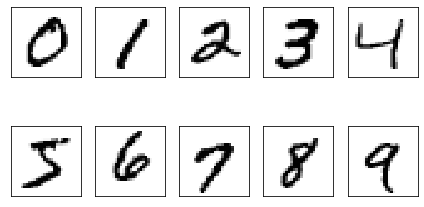

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0]
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train.dtype

dtype('uint8')

## 3.데이터 전처리

### 3.1 data(X) 레이블 인코딩
- 0과 1사이의 값으로 변환
- 0 ~ 255값을 0~1사이의 값으로 표준화 시키기 위해 data/255로 나누어 줌

In [6]:
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)

(60000, 784) float32
(10000, 784) float32


In [7]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 3.2 Class(target) 레이블 인코딩
- class를 각각 나누어서 10개로 분류

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

In [11]:
print(y_train_c.shape, y_test_c.shape)

(60000, 10) (10000, 10)


In [12]:
y_train_c

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
y_test_c

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 4.훈련/검증용 데이터 분할
- test_size: 검증데이터 30%
- random_state : random seed 번호 = 1
- stratify : y(클래스)의 비율에 따라 분할

## 5.모델구축

### 5.1 신경망 구성

In [14]:
np.random.seed(1)

model = tf.keras.models.Sequential()

model.add(Dense(units=50, 
                input_dim=X_train.shape[1], 
                activation="tanh"))

model.add(Dense(units=50, 
                activation="tanh"))

model.add(Dense(units=y_test_c.shape[1], 
                activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


### 5.2 신경망 훈련
- 이진 분류 : binary_crossentropy
- 다중 분류 : categorical_crossentropy
- 다양한 최적화 옵션은 keras 창시자에게 배우는 딥러닝을 참조

In [16]:
sgd_optimizer = SGD(lr=0.001, 
                    decay=1e-7, 
                    momentum=.9)

model.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [17]:
np.random.seed(1)

history = model.fit(X_train, 
                    y_train_c,
                    batch_size=64, 
                    epochs=30,
                    validation_split=0.1, # 검증용 데이터 10% 추출해서 훈련시 검정. 교차검증은 복잡한 과정을 거쳐야 함             
                    verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 3s 53us/sample - loss: 0.9550 - accuracy: 0.7620 - val_loss: 0.4764 - val_accuracy: 0.8987
Epoch 2/30
54000/54000 [==============================] - 2s 39us/sample - loss: 0.4634 - accuracy: 0.8816 - val_loss: 0.3363 - val_accuracy: 0.9178
Epoch 3/30
54000/54000 [==============================] - 2s 37us/sample - loss: 0.3721 - accuracy: 0.8987 - val_loss: 0.2872 - val_accuracy: 0.9247
Epoch 4/30
54000/54000 [==============================] - 2s 34us/sample - loss: 0.3302 - accuracy: 0.9076 - val_loss: 0.2609 - val_accuracy: 0.9302
Epoch 5/30
54000/54000 [==============================] - 2s 35us/sample - loss: 0.3036 - accuracy: 0.9135 - val_loss: 0.2430 - val_accuracy: 0.9332
Epoch 6/30
54000/54000 [==============================] - 2s 41us/sample - loss: 0.2836 - accuracy: 0.9188 - val_loss: 0.2289 - val_accuracy: 0.9357
Epoch 7/30
54000/54000 [==============================] -

## 6. 모델검정

### 6.1  test 데이터 정확도

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test_c)
print('test 비용: %.4f%%' % (test_loss))
print('test 정확도: %.4f%%' % (test_acc))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test 비용: 0.1317%
test 정확도: 0.9609%


### 6.2 그래프로 확인

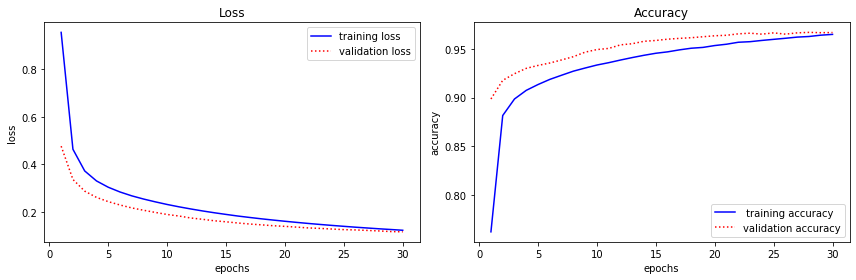

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

# 비용함수
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, 'b-', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.legend()

# 정확도
plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel('epochs')
plt.plot(epochs, accuracy, 'b-', label=" training accuracy")
plt.plot(epochs, val_accuracy, 'r:', label="validation accuracy")
plt.legend()

plt.tight_layout()
plt.show()

## 부록: 계산 그래프 시각화하기

In [20]:
import datetime
import os

In [21]:
%load_ext tensorboard

In [22]:
log_dir = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("logs", log_dir)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

In [23]:
sgd_optimizer = SGD(lr=0.001, 
                    decay=1e-7, 
                    momentum=.9)

model.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [24]:
history = model.fit(X_train, 
                    y_train_c,
                    batch_size=64, 
                    epochs=10,
                    validation_data=(X_test, y_test_c), 
                    callbacks=[tensorboard_callback],                     
                    verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1193 - accuracy: 0.9661 - val_loss: 0.1302 - val_accuracy: 0.9600
Epoch 2/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1164 - accuracy: 0.9665 - val_loss: 0.1275 - val_accuracy: 0.9623
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1134 - accuracy: 0.9676 - val_loss: 0.1249 - val_accuracy: 0.9624
Epoch 4/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1107 - accuracy: 0.9683 - val_loss: 0.1223 - val_accuracy: 0.9634
Epoch 5/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1082 - accuracy: 0.9695 - val_loss: 0.1210 - val_accuracy: 0.9633
Epoch 6/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1056 - accuracy: 0.9698 - val_loss: 0.1192 - val_accuracy: 0.9637
Epoch 7/10
60000/60000 [==============================] 

In [25]:
from tensorflow.keras.callbacks import TensorBoard

In [30]:
%tensorboard --logdir logs --port 6006

Reusing TensorBoard on port 6006 (pid 4604), started 11 days, 9:53:10 ago. (Use '!kill 4604' to kill it.)

## 부록: 일반 데이터의 표준화
- mean and std : 평균과 표준편차는 훈련용(X_train)에서 구함
- test 데이터의 평균과 표준편차도 훈련용(X_train) 평균과 표준편차를 사용해야 함
- test용 데이터는 그대로 사용해야 함

In [ ]:
mean_vals = np.mean(X_train, axis=0)
std_val = np.std(X_train, axis=0)

X_train = (X_train - mean_vals)/std_val
X_test = (X_test - mean_vals)/std_val
 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)